## b) Interpolação por trazadores cúbicos (*cubic splines*)


Permite encontrar valores intermediarios em um conjunto de dados usando polinomios cubicos.

Assuma que temos $n+1$ pontos, $x_0, x_1,..., x_n$, tal que $x_0 < x_1 <...<  x_n$.

Uma função *spline*, $s$ de ordem $k$, com $n+1$ pontos é definida como:  

* Em cada sub-intervalo $[ x_{i-1}, x_i )$, $s$ é um polinomio de grau $k$.

* $s$ têm $k-1$ derivadas continuas no intervalo total $[x_{0}, x_n]$.


A função *spline* mais comum é aquela com $k=3$, ou *spline* cúbico.

Se alem dos $n+1$  pontos temos os valores da função $y_0 = f(x_0), y_1 = f(x_1), ..., y_n = f(x_n)$.
Por definição, os polinomios devem interpolar o mesmo ponto:

$$
s_{i-1}(x_i) = y_i = s_i(x_i) \;,
$$

Com $1\le i \le n-1$. No total temos $n$ polinomios do tipo:

$$
s_{i}(x) = a_{i0} + a_{i1}x + a_{i2} x^2 + a_{i3} x^3 \;,
$$

o que implica que teremos ${\bf 4n}$ coeficientes para determinar. Cada sub-intervalo possui duas
condições:

$$
y_i = s(x_i) \; \;{\rm e} \; \;   y_{i+1} = s(x_{i+1}) \;,
$$

que devem ser satisfeitas.

Já que $s'$ e $s''$ são continuas, temos:

$$
s'_{i-1}(x_i) = s'_i(x_i) \;\;, {\rm e }\;\; s''_{i-1}(x_i) = s''_i(x_i)
$$

proporcionando $n-1$ e $n-1$ condições, respetivamente. No total temos $4n$ coeficientes
e $4n-2$ equações, precisamos ainda determinar $2$ graus de liberdade.

Partindo da ultima equação definimos dois valores para a segunda derivada:

$$
s''_{i}(x_i) = f_i \;\;, {\rm e }\;\; s''_{i}(x_{i+1}) = f_{i+1}
$$


Uma linha reta entre os pontos $f_i$ e $f_{i+1}$ é:

$$
s''_{i}(x) = \frac{f_i}{x_{i+1} - x_i}(x_{i+1} - x) + \frac{f_{i+1}}{x_{i+1} - x_i}(x - x_i)
$$

e integrando duas vezes temos:

$$
s_i(x) = \frac{f_i}{6(x_{i+1}-x_i)}(x_{i+1}-x)^3+
               \frac{f_{i+1}}{6(x_{i+1}-x_i)}(x-x_i)^3
             +c(x-x_i)+d(x_{i+1}-x).
$$

Usando as condições  $s_i(x_i)=y_i$ e $s_i(x_{i+1})=y_{i+1}$ 
podemos de fato determinar as constantes $c$ e $d$ o que resulta em


\begin{eqnarray} 
s_i(x) &=& \frac{f_i}{6(x_{i+1}-x_i)}(x_{i+1}-x)^3+
               \frac{f_{i+1}}{6(x_{i+1}-x_i)}(x-x_i)^3 \\\nonumber
       &+& (\frac{y_{i+1}}{x_{i+1}-x_i}-\frac{f_{i+1}(x_{i+1}-x_i)}{6})
              (x-x_i)+
             (\frac{y_{i}}{x_{i+1}-x_i}-\frac{f_{i}(x_{i+1}-x_i)}{6})
             (x_{i+1}-x).
\end{eqnarray}

Mas como determinamos as segundas derivadas $f_i$ e $f_{i+1}$? Usando a condição de continuidade para
a primeira derivada:

$$
s'_{i-1}(x_i) = s'_i(x_i) \;\;,
$$

e fazendo $x=x_i$.  Definindo $h = x_{i+1} - x_i$, obtemos a seguinte expressão:

$$
h_{i-1}f_{i-1}+2(h_{i}+h_{i-1})f_i+h_if_{i+1}=
   \frac{6}{h_i}(y_{i+1}-y_i)-\frac{6}{h_{i-1}}(y_{i}-y_{i-1}),
$$

Finalmente fazemos a mudança de viriável: $u_i = 2(h_i + h_{i-1})$,
$\nu_i = \frac{6}{h_i} (y_{i+1} - y_i) - \frac{6}{h_{i-1}} (y_i - y_{i-1})$,
podemos re-escrever o problema como um conjunto de equações que pode ser resolvido usando
algebra matricial. Para o caso, pela forma da matriz precisamos de um algoritmo que
resolva matrizes tridiagonais.

$$
\begin{bmatrix} u_1 & h_1 &0 &\dots & & & & \\
                                 h_1 & u_2 & h_2 &0 &\dots & & & \\
                                  0   & h_2 & u_3 & h_3 &0 &\dots & & \\
                               \dots& & \dots &\dots &\dots &\dots &\dots & \\
                                 &\dots & & &0 &h_{n-3} &u_{n-2} &h_{n-2} \\
                                 & && & &0 &h_{n-2} &u_{n-1} \end{bmatrix}
   \begin{bmatrix} f_1 \\ 
                          f_2 \\
                          f_3\\
                          \dots \\
                          f_{n-2} \\ 
                          f_{n-1} \end{bmatrix} =
   \begin{bmatrix} v_1 \\ 
                          v_2 \\
                          v_3\\
                          \dots \\
                          v_{n-2}\\
                          v_{n-1} \end{bmatrix}.
$$

Essa matriz resolve um sistema tridiagonal de equações, ou seja, so as 3 diagonais principais tem elementos. Esse sistema pode ser resolvido por substituição. Como sistemas desse tipo aparecem com frequência em problemas numéricos, existem rotinas sofisticadas para resolve-los.  Usaremos a rotina `tridiag.py`. 

## Rotina para calcular splines em fortran90

Vamos utilizar a rotina `spline.90` escrita em fortran 90 para fazer interpolação de splines cubicos.

* Fazendo isso aprendemos a utilizar, compilar e executar, código diferente a python em `Jupyter`
* E aprendemos a criar modulos criados nesses outros programas dentro do python, o qual se traduz em eficiencia do código 

In [100]:
%%file spline.f90

MODULE constantes
  ! definicao de variaveis para precisao dupla
  INTEGER,  PARAMETER :: dp = KIND(1.0D0)
  INTEGER, PARAMETER :: dpc = KIND((1.0D0,1.0D0))
  ! Parametro de truncamento
  REAL(DP), PARAMETER, PUBLIC ::  truncamento=1.0E-10
END MODULE constantes

  ! takes as input x[1,..,n] and y[1,..,n] containing a tabulation
  ! y_i = f(x_i) with x_0 < x_1 < .. < x_(n - 1) 
  ! together with yp_1 and yp2 for first derivatives  f(x) at x_0 
  ! and x_(n-1), respectively. Then the
  ! function returns y2[1,..,n] which contains the second 
  ! derivatives of f(x_i)at each point x_i. If yp1 and/or yp2 
  ! is larger than the constant INFINITY the function will 
  ! put corresponding second derivatives to zero.

  SUBROUTINE spline(x,y,n,yp1,ypn,y2)
    USE constantes
    IMPLICIT NONE
    INTEGER :: i, k, n
    REAL(DP), DIMENSION(n) :: x, y, y2
    REAL(DP), DIMENSION(:), ALLOCATABLE :: u
    REAL(DP) :: p, qn, sig, un, ypn, yp1 

    ALLOCATE ( u (n) )
    IF (yp1 > .99E30) THEN
       y2(1)=0.
       u(1)=0.
    ELSE
       y2(1)=-0.5
       u(1)=(3./(x(2)-x(1)))*((y(2)-y(1))/(x(2)-x(1))-yp1)
    ENDIF
    DO i=2,n-1
       sig=(x(i)-x(i-1))/(x(i+1)-x(i-1))
       p=sig*y2(i-1)+2.
       y2(i)=(sig-1.)/p
       u(i)=(6.*((y(i+1)-y(i))/(x(i+1)-x(i))-(y(i)-y(i-1)) &
            /(x(i)-x(i-1)))/(x(i+1)-x(i-1))-sig*u(i-1))/p
    ENDDO
    IF (ypn > .99E30) THEN
       qn=0.
       un=0.
    ELSE
       qn=0.5
       un=(3./(x(n)-x(n-1)))*(ypn-(y(n)-y(n-1))/(x(n)-x(n-1)))
    ENDIF
    y2(n)=(un-qn*u(n-1))/(qn*y2(n-1)+1.)
    DO k=n-1,1,-1
       y2(k)=y2(k)*y2(k+1)+u(k)
    ENDDO
    DEALLOCATE ( u )

  END SUBROUTINE spline

Overwriting spline.f90


In [101]:
!rm spline.pyf
!f2py -m spline -h spline.pyf spline.f90

rm: cannot remove 'cs.pyf': No such file or directory
Reading fortran codes...
	Reading file 'spline.f90' (format:free)
Post-processing...
	Block: spline
			Block: constantes
			Block: spline
Post-processing (stage 2)...
	Block: spline
		Block: unknown_interface
			Block: constantes
			Block: spline
Saving signatures to file "./spline.pyf"


In [102]:
!f2py -c spline.pyf spline.f90

running build
running config_cc
unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
build_src
building extension "spline" sources
creating /tmp/tmpd8xy5z0d/src.linux-x86_64-3.5
f2py options: []
f2py: spline.pyf
Reading fortran codes...
	Reading file 'spline.pyf' (format:free)
Post-processing...
	Block: spline
			Block: constantes
			Block: spline
Post-processing (stage 2)...
	Block: spline
		Block: unknown_interface
			Block: constantes
			Block: spline
Building modules...
	Building module "spline"...
		Constructing wrapper function "spline"...
		  spline(x,y,yp1,ypn,y2,[n])
		Constructing F90 module support for "constantes"...
		  Variables: dp truncamento dpc
	Wrote C/API module "spline" to file "/tmp/tmpd8xy5z0d/src.linux-x86_64-3.5/splinemodule.c"
	Fortran 90 wrappers are saved to "/tmp/tmpd8xy5z0d/src.linux-x86_64-3.5/spline-f2pyw

In [103]:
import spline as sp
import numpy as np

A seguinte rotina recolhe os pontos conhecidos e organiza a matriz tridiagonal

In [104]:
def f(x):
    return (x-3)**2
xis = np.array([2,3,4])
y = f(xis)

In [105]:
y2 = np.zeros(3)
sp.cs.spline(xis,y,-2.,2.,y2)
xis, y2

(array([2, 3, 4]), array([2., 2., 2.]))

In [107]:
def splintpy(xa,ya,y2a,xv):
    y=np.zeros(len(xv))
    i = 0
    for x in xv:
        
        klo=0
        khi=2
        if  (khi-klo > 1):
            k=int((khi+klo)/2)
            if(xa[k]  > x):
                khi=k
            else:  klo=k

        h=xa[khi]-xa[klo]
        if (h==0.):
            print("bad xa input")
        else: 
            a=(xa[khi]-x)/h
            b=(x-xa[klo])/h
            y[i]=a*ya[klo]+b*ya[khi]+ ((a**3-a)*y2a[klo]+(b**3-b)*y2a[khi])*(h**2)/6.
            i +=1
    return y

In [113]:
N = 20
y_int = 0.
x1 = np.linspace(2.,4.,20)

y1 = splintpy(xis,y,y2,x1)

In [114]:
import matplotlib.pylab as plt
%matplotlib inline

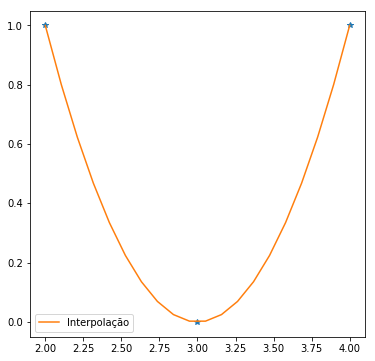

In [116]:
fig, ax = plt.subplots()
fig.set_size_inches(6,6)          # Make graph square
plt.plot(xis,y,'*')
plt.plot(x1,y1,label='Interpolação')
plt.legend()